# Coursera capstone - Neighborhoods of Toronto

In [ ]:
#import required modules
from bs4 import BeautifulSoup # library to scrape information from web pages
import urllib.request # library to open URLs
import pandas as pd # library for data analsysis

## 1. Gathering and collecting data from wikipedia table

Beautifulsoup package is used for scraping webpages and urllib is used to open URLS. Information is colleted and stored repectively in python list.

In [7]:
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
page = urllib.request.urlopen(url) 
soup = BeautifulSoup(page, 'lxml')

In [8]:
#list to store wiki data
wiki_data = []

# Find table in wiki page
# loop for every row in table
for row in soup.findAll('tr'):
    
    # list to store row information
    lst = []
    
    # loop through every data in a table row
    for col in row.findAll('td'):
        
        # collect row data
        lst.append(col.text.strip())
    
    # aviod adding unwanted information
    if len(lst) == 3:
        wiki_data.append(lst)

## 2. Creating pandas dataframe out of wiki data



In [11]:
pd.set_option('display.max_colwidth', None)

df = pd.DataFrame(wiki_data)

df.head()

,0,1,2
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


### 2.1. Rename dataframe columns

In [13]:
df.columns = ['Postalcode', 'Borough', 'Neighborhood']
df.head()

,Postalcode,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


### 2.2  Ignore cells with a borough that is " *Not assigned* ".

In [15]:
df_filterd = df.drop(df[df['Borough'] == "Not assigned"].index, axis=0)
df_filterd.reset_index(drop=True, inplace=True)
df_filterd.head()

,Postalcode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


### 2.3 Combine multiple neighborhoods in one postal code using comma

In [19]:
df_filterd_grp = df_filterd.groupby(['Postalcode', 'Borough'])['Neighborhood'].apply(lambda x: ",".join(x)).reset_index()
df_filterd_grp.tail()

,Postalcode,Borough,Neighborhood
98,M9N,York,Weston
99,M9P,Etobicoke,Westmount
100,M9R,Etobicoke,"Kingsview Village, St. Phillips, Martin Grove Gardens, Richview Gardens"
101,M9V,Etobicoke,"South Steeles, Silverstone, Humbergate, Jamestown, Mount Olive, Beaumond Heights, Thistletown, Albion Gardens"
102,M9W,Etobicoke,"Northwest, West Humber - Clairville"


### 2.4  Make the neighborhood same as the borough, if neighborhood not asigned to a defined borough

In [22]:
df_filterd_grp['Neighborhood'].replace('Not assigned', df['Borough'], inplace=True)
df_filterd_grp.tail()

,Postalcode,Borough,Neighborhood
98,M9N,York,Weston
99,M9P,Etobicoke,Westmount
100,M9R,Etobicoke,"Kingsview Village, St. Phillips, Martin Grove Gardens, Richview Gardens"
101,M9V,Etobicoke,"South Steeles, Silverstone, Humbergate, Jamestown, Mount Olive, Beaumond Heights, Thistletown, Albion Gardens"
102,M9W,Etobicoke,"Northwest, West Humber - Clairville"


### 2.5 Dataframe shape

In [24]:
df_filterd_grp.shape

(103, 3)

## 3. Get the latitude and the longitude coordinates of each neighborhood.

In [36]:
df_geo_loc = pd.read_csv("Geospatial_Coordinates.csv")
df_geo_loc.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


### 3.1 Rename the location dataframe column to match the postalcode in the main dataframe

In [37]:
df_geo_loc.rename(columns={'Postal Code':'Postalcode'}, inplace=True)
df_geo_loc.head()

,Postalcode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


### 3.2 Merge the location and main dataframe

In [42]:
df_merged = df_filterd_grp.join(df_geo_loc.set_index("Postalcode"), on="Postalcode")
df_merged.head()

,Postalcode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


## 4. Explore neighborhoods of Toronto

In [79]:
import folium # map rendering library
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

### 4.1 Getting the latitude and longitude of Toronto location

In [80]:
address = 'Toronto'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto City are 43.6534817, -79.3839347.


### 4.2 Obtain the Boroughs that match Toronto

In [81]:
toronto_data = neighborhoods[neighborhoods['Borough'].str.contains('Toronto')].reset_index(drop=True)
pd.DataFrame(toronto_data['Borough'].unique(), columns=['Borough'])

,Borough
0,East Toronto
1,Central Toronto
2,Downtown Toronto
3,West Toronto


### 4.3 Create a map of Toronto with neighborhoods superimposed on top

In [87]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

#get the neighborhoods data
neighborhoods = toronto_data

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

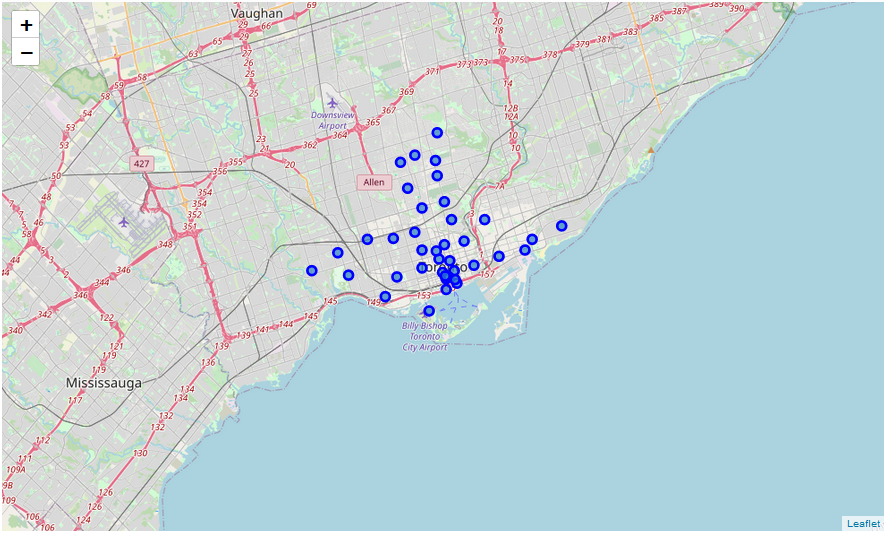

### 4.4 Get nearby venues of Toronto neighborhoods

In [98]:
import json # library to handle JSON files
import requests # library to handle requests

In [99]:
with open('foursq_credentials.json') as json_data:
    fsq_cred = json.load(json_data)

VERSION = '20180605' # Foursquare API version
LIMIT = 100

In [100]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            fsq_cred['CLIENT_ID'], 
            fsq_cred['CLIENT_SECRET'], 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [102]:
toronto_venues = getNearbyVenues(names=toronto_data['Neighborhood'],
                                   latitudes=toronto_data['Latitude'],
                                   longitudes=toronto_data['Longitude']
                                  )

The Beaches
The Danforth West, Riverdale
India Bazaar, The Beaches West
Studio District
Lawrence Park
Davisville North
North Toronto West,  Lawrence Park
Davisville
Moore Park, Summerhill East
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
Rosedale
St. James Town, Cabbagetown
Church and Wellesley
Regent Park, Harbourfront
Garden District, Ryerson
St. James Town
Berczy Park
Central Bay Street
Richmond, Adelaide, King
Harbourfront East, Union Station, Toronto Islands
Toronto Dominion Centre, Design Exchange
Commerce Court, Victoria Hotel
Roselawn
Forest Hill North & West, Forest Hill Road Park
The Annex, North Midtown, Yorkville
University of Toronto, Harbord
Kensington Market, Chinatown, Grange Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
Stn A PO Boxes
First Canadian Place, Underground city
Christie
Dufferin, Dovercourt Village
Little Portugal, Trinity
Brockton, Parkdale Village, Exhibition Place
High

**Number of venues nearby Toronto retured by foursquare API**

In [114]:
print(toronto_venues.shape)
toronto_venues.head()

(1625, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The Beaches,43.676357,-79.293031,Glen Manor Ravine,43.676821,-79.293942,Trail
1,The Beaches,43.676357,-79.293031,The Big Carrot Natural Food Market,43.678879,-79.297734,Health Food Store
2,The Beaches,43.676357,-79.293031,Grover Pub and Grub,43.679181,-79.297215,Pub
3,The Beaches,43.676357,-79.293031,Upper Beaches,43.680563,-79.292869,Neighborhood
4,"The Danforth West, Riverdale",43.679557,-79.352188,MenEssentials,43.677820,-79.351265,Cosmetics Shop


**Counts of Venues near each neihborhood in Toronto**

In [109]:
toronto_venues[['Neighborhood', 'Venue']].groupby('Neighborhood').count().reset_index()

,Neighborhood,Venue
0,Berczy Park,58
1,"Brockton, Parkdale Village, Exhibition Place",23
2,"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",18
3,"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",14
4,Central Bay Street,70
5,Christie,16
6,Church and Wellesley,71
7,"Commerce Court, Victoria Hotel",100
8,Davisville,33
9,Davisville North,9


**Unique categories of venues returned by foursquare API**

In [112]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 232 uniques categories.


### 4.5 Analysing each neighborhood

In [129]:
# one hot encoding -> get dummy index corresponding to each categorical variable
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
lst = list(toronto_onehot.columns)
lst.remove('Neighborhood')
fixed_columns = ['Neighborhood'] + lst
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Neighborhood,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,The Beaches,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"The Danforth West, Riverdale",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [131]:
toronto_onehot.shape

(1625, 232)

**Grouping rows by neighborhood and taking the mean of the frequency of occurrence of each category**

In [133]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped.head()

,Neighborhood,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Berczy Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.017241,...,0.0,0.0,0.0,0.017241,0.0,0.0,0.000000,0.0,0.0,0.000000
1,"Brockton, Parkdale Village, Exhibition Place",0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.043478
2,"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
3,"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",0.071429,0.071429,0.071429,0.214286,0.071429,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
4,Central Bay Street,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.014286,0.0,0.0,0.014286,0.0,0.0,0.014286


**Now the data is grouped with respect to 39 neighborhoods having the 232 venue categories containing averege occourance of each catergory**

In [135]:
toronto_grouped.shape

(39, 232)

**Top 5 Venue catergories for each neighborhood, for simpliciy lets print for 3 neighborhoods**

In [139]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood'][0:3]:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berczy Park----
            venue  freq
0     Coffee Shop  0.09
1    Cocktail Bar  0.05
2          Bakery  0.03
3  Farmers Market  0.03
4     Cheese Shop  0.03


----Brockton, Parkdale Village, Exhibition Place----
            venue  freq
0            Café  0.13
1  Breakfast Spot  0.09
2     Coffee Shop  0.09
3          Bakery  0.04
4       Pet Store  0.04


----Business reply mail Processing Centre, South Central Letter Processing Plant Toronto----
                venue  freq
0  Light Rail Station  0.11
1                 Spa  0.06
2       Garden Center  0.06
3                Park  0.06
4          Comic Shop  0.06




**Function to return most common venues**

In [140]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

**Creating data containing top 10 venues nearby that neighborhood**

In [142]:
import numpy as np # library to handle data in a vectorized manner

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Coffee Shop,Cocktail Bar,Pharmacy,Bakery,Seafood Restaurant,Farmers Market,Restaurant,Beer Bar,Cheese Shop,Café
1,"Brockton, Parkdale Village, Exhibition Place",Café,Coffee Shop,Breakfast Spot,Yoga Studio,Stadium,Burrito Place,Restaurant,Climbing Gym,Performing Arts Venue,Bakery
2,"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",Light Rail Station,Comic Shop,Garden,Brewery,Burrito Place,Spa,Farmers Market,Fast Food Restaurant,Butcher,Restaurant
3,"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",Airport Service,Airport,Boat or Ferry,Plane,Coffee Shop,Rental Car Location,Sculpture Garden,Boutique,Harbor / Marina,Airport Food Court
4,Central Bay Street,Coffee Shop,Italian Restaurant,Sandwich Place,Café,Japanese Restaurant,Bubble Tea Shop,Bar,Thai Restaurant,Salad Place,Burger Joint


### 4.6 Clustering Neighborhoods

In [144]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

**Include cluster labels in the dataframe**

In [145]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = toronto_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head() # check the last columns!

,Postalcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M4E,East Toronto,The Beaches,43.676357,-79.293031,0,Health Food Store,Trail,Pub,Yoga Studio,Dessert Shop,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant
1,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,0,Greek Restaurant,Coffee Shop,Italian Restaurant,Furniture / Home Store,Restaurant,Ice Cream Shop,Yoga Studio,Pub,Lounge,Dessert Shop
2,M4L,East Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572,0,Intersection,Pub,Burrito Place,Brewery,Sandwich Place,Board Shop,Fast Food Restaurant,Fish & Chips Shop,Restaurant,Steakhouse
3,M4M,East Toronto,Studio District,43.659526,-79.340923,0,Café,Coffee Shop,Brewery,Gastropub,American Restaurant,Bakery,Yoga Studio,Comfort Food Restaurant,Seafood Restaurant,Sandwich Place
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790,1,Park,Bus Line,Swim School,Yoga Studio,Diner,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant


**Display map of with clustering information**

In [151]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

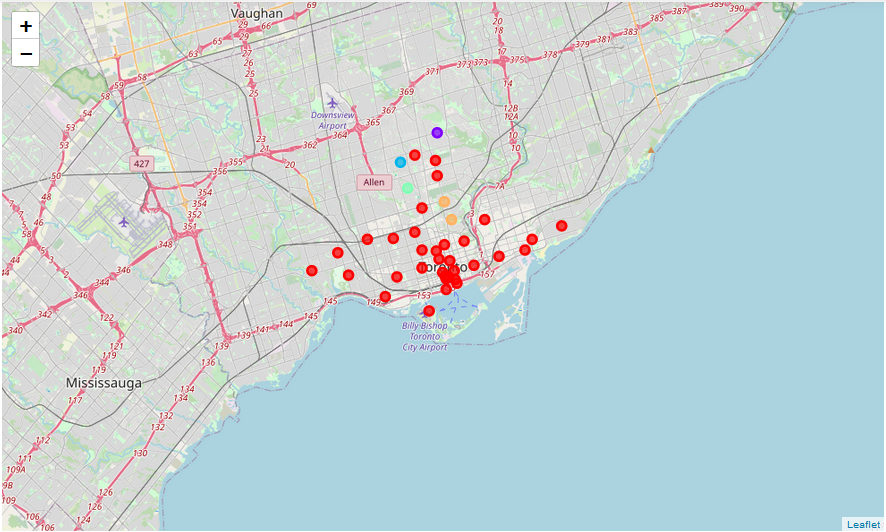

## Completed the exploration, segmentation and clustering of Toronto neighborhood.

## Greetings!